Daniel Ruiz, MSc in Data Science and Business Analytics (DSBA), Bocconi University

# Convolutional Neural Networks in Python - Fashion Images Classification

Tutorial from DataCamp. Minor modifications applied.
- https://www.datacamp.com/community/tutorials/convolutional-neural-networks-pythonm


# 1. Preparing the data

In [1]:
# import packages
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# graphs
import matplotlib.pyplot as plt

# neural networks
import keras
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Input, Model, Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Fashion-MNIST = 70k Zalando's 28x28 grayscale images of fashion products from 10 categories

# load data
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

# analyze data -> in case there's an image that's not 28x28
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

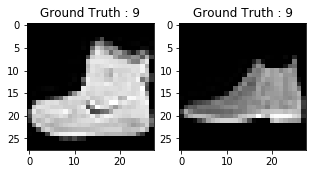

In [4]:
# looking at two images
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
# reshape matrices: 28x28 -> 28x28x1
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# data type: int8 -> float32
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# re-scale: 0-255 -> 0-1
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
test_Y_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape)
print(valid_X.shape)
print(train_label.shape)
print(valid_label.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


# 2. Modelling the data

## 2.1. Basic Model (Without Drop-Out)

In [10]:
# parameters
batch_size = 64
epochs = 10
num_classes = 10

# architecture: 3 layers
# 1st layer = 32-3 x 3 filters
# 2nd layer = 64-3 x 3 filters
# 3rd layer = 128-3 x 3 filters

# structure: layer, activation (Leaky ReLU, max-pooling (2x2)

# sequential
fashion_model = Sequential()
# layer 1 = 32-3 x 3
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
# layer 2 = 64-3 x 3 filters
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# layer 3 = 128-3x3 filters
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# flatten, dense layer, activation (ReLU), output
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

# visualize the model
print(fashion_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [11]:
# compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

# train the model
fashion_train = fashion_model.fit(train_X,
                                  train_label,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.4544 - accuracy: 0.8350 - val_loss: 0.3416 - val_accuracy: 0.8755
Epoch 2/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2888 - accuracy: 0.8941 - val_loss: 0.2706 - val_accuracy: 0.8984
Epoch 3/10
48000/48000 [==============================] - 72s 1ms/step - loss: 0.2421 - accuracy: 0.9110 - val_loss: 0.2485 - val_accuracy: 0.9078
Epoch 4/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.2063 - accuracy: 0.9248 - val_loss: 0.2444 - val_accuracy: 0.9118
Epoch 5/10
48000/48000 [==============================] - 64s 1ms/step - loss: 0.1820 - accuracy: 0.9325 - val_loss: 0.2277 - val_accuracy: 0.9170
Epoch 6/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.1585 - accuracy: 0.9406 - val_loss: 0.2363 - val_accuracy: 0.9170
Epoch 7/10
48000/48000 [==============================] - 65s 1ms/st

In [12]:
# model evaluation on test set
test_eval = fashion_model.evaluate(test_X,
                                   test_Y_one_hot,
                                   verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.27739162355363367
Test accuracy: 0.9146999716758728


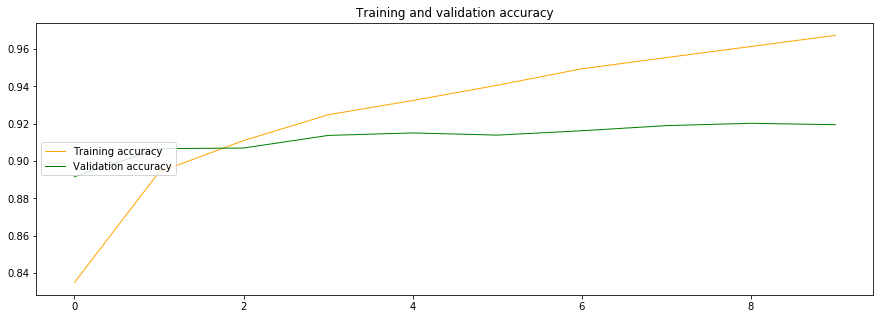

<Figure size 432x288 with 0 Axes>

In [30]:
# performance in valdiation and test set

for metrica in metricas:
    met = fashion_train.history[metrica]
    val_met = fashion_train_dropout.history['val_'+metrica]
    epochs = range(len(met))
    plt.figure(figsize=(15,5))
    plt.plot(epochs, met, 'b', c='orange', label='Training '+metrica,lw=1)
    plt.plot(epochs, val_met, 'b', c='green', label='Validation '+metrica,lw=1)
    plt.title('Training and validation '+metrica)
    plt.legend(loc='center left')
    plt.figure()

## 2.2. Model 2 (With Drop-Out)

In [14]:
# parameters
batch_size = 64
epochs = 10
num_classes = 10

# architecture: 3 layers
# 1st layer = 32-3 x 3 filters
# 2nd layer = 64-3 x 3 filters
# 3rd layer = 128-3 x 3 filters

# structure: layer, activation (Leaky ReLU, max-pooling (2x2), drop-out

# sequential
fashion_model = Sequential()
# layer 1 = 32-3 x 3
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
# layer 2 = 64-3 x 3
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
# layer 3 = 128-3 x 3
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
# flatten, dense layer, activation (ReLU), output
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

# visualize the model
print(fashion_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [16]:
# compile the model
metricas = ['accuracy']
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=metricas)

# train the model
fashion_train_dropout = fashion_model.fit(train_X,
                                          train_label,
                                          batch_size=batch_size,
                                          epochs=epochs,
                                          verbose=1,
                                          validation_data=(valid_X, valid_label))

# save
#fashion_model.save('model.h5')

# load model
#model = keras.models.load_model('model.h5')

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 74s 2ms/step - loss: 0.3253 - accuracy: 0.8795 - val_loss: 0.2879 - val_accuracy: 0.8917
Epoch 2/10
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2937 - accuracy: 0.8927 - val_loss: 0.2532 - val_accuracy: 0.9067
Epoch 3/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.2786 - accuracy: 0.8960 - val_loss: 0.2547 - val_accuracy: 0.9070
Epoch 4/10
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2646 - accuracy: 0.8999 - val_loss: 0.2414 - val_accuracy: 0.9137
Epoch 5/10
48000/48000 [==============================] - 99s 2ms/step - loss: 0.2521 - accuracy: 0.9065 - val_loss: 0.2292 - val_accuracy: 0.9151
Epoch 6/10
48000/48000 [==============================] - 97s 2ms/step - loss: 0.2455 - accuracy: 0.9082 - val_loss: 0.2305 - val_accuracy: 0.9139
Epoch 7/10
48000/48000 [==============================] - 92s 2ms/st

# 3. Evaluating performance

## 3.1. Loss and accuracy

In [17]:
# test set final loss and accuracy
test_eval = fashion_model.evaluate(test_X,
                                   test_Y_one_hot,
                                   verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 4s 385us/step
Test loss: 0.2307192940235138
Test accuracy: 0.9164999723434448


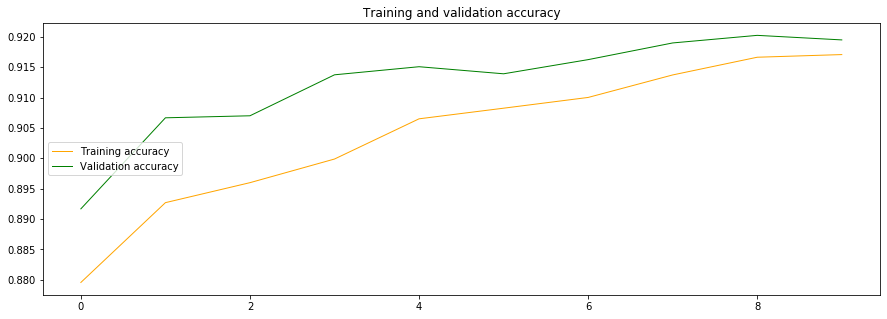

<Figure size 432x288 with 0 Axes>

In [33]:
# performance in valdiation and test set

for metrica in metricas:
    met = fashion_train_dropout.history[metrica]
    val_met = fashion_train_dropout.history['val_'+metrica]
    epochs = range(len(met))
    plt.figure(figsize=(15,5))
    plt.plot(epochs, met, 'b', c='orange', label='Training '+metrica,lw=1)
    plt.plot(epochs, val_met, 'b', c='green', label='Validation '+metrica,lw=1)
    plt.title('Training and validation '+metrica)
    plt.legend(loc='center left')
    plt.figure()

## 3.2. Hit and miss analysis

In [24]:
# predicted class = most likely (MECE)
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

print(predicted_classes.shape)
print(test_Y.shape)

(10000,)
(10000,)


Found 9147 correct labels


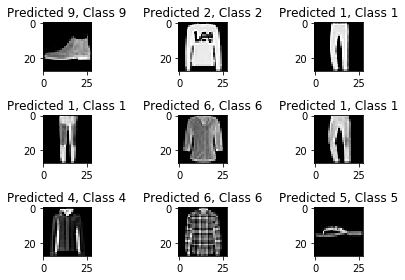

In [28]:
# correct classification examples
correct = np.where(predicted_classes==test_Y)[0]

print("Found {} correct labels".format(len(correct)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 853 incorrect labels


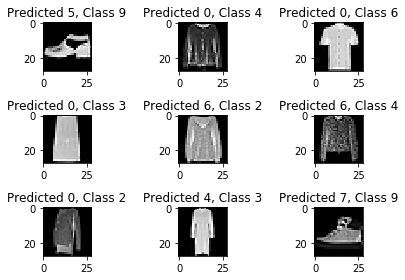

In [29]:
# incorrect classification examples
incorrect = np.where(predicted_classes!=test_Y)[0]

print("Found {} incorrect labels".format(len(incorrect)))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

# 3.3. Precision and recall analysis

In [27]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.91      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.88      0.88      1000
     Class 3       0.92      0.91      0.92      1000
     Class 4       0.87      0.87      0.87      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.82      0.70      0.75      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

